# Striatum example network

This notebook creates the striatum scaffold model. Since the CPU resources on EBRAINS are limited, we run a small subset of the full network. If you have access to a powerful desktop you can increase the ```number_of_neurons``` below to run a larger network.

Networks of at least 150 neurons will contain dSPN (47.5%), iSPN (47.5%), FS (1.3%), LTS (0.7%) and ChIN (1.1%). If you run a smaller network not all neuron types might be represented.

The volume of the network is scaled to maintain 80500 neurons per mm3. The connection probability between pairs of neurons matches experimental data.

![striatum](striatum-fig.svg)

In [1]:
number_of_neurons = 50

%matplotlib inline

## Start ipcluster

For larger networks it can be helpful to run the network creation code in parallel. You can start the ipyparallel workers using ```start_ipcluster.sh``` located in the ```examples/notebook``` directory. After starting ipcluster give it a few seconds to startup before proceeding with the rest of the commands in this notebook. To stop the cluster use ```ipcluster stop```.

For instructions how to install and activate ipyparallel for your notebook see 
https://github.com/ipython/ipyparallel

## Check if ipyparallel is running.

In [ ]:
import os, subprocess, time

os.environ["IPYTHONDIR"] = os.path.join(os.path.abspath(os.getcwd()), ".ipython")
#os.environ["IPYTHONDIR"] = os.path.expanduser("~/.ipython")
os.environ["IPYTHON_PROFILE"] = "default"

# Unix syntax
#os.system("ipcluster start -n 4 --profile=$IPYTHON_PROFILE --ip=127.0.0.1 --log-level ERROR 2> parallel-log.txt &")

# Windows syntax
profile = os.environ["IPYTHON_PROFILE"]
#os.system(f"start /B ipcluster start -n 4 --profile={profile} --ip=127.0.0.1 --log-level ERROR > parallel-log.txt 2>&1")
#os.system("ipcluster start -n 4 --profile=default")

subprocess.Popen(
    ["ipcluster", "start", "-n", "4", f"--profile={profile}"],
    stdout=open("parallel-log.txt", "w"),
    stderr=subprocess.STDOUT
)

time.sleep(10) # Wait for ipcluster to start

In [ ]:
from ipyparallel import Client

rc = Client(profile="default", timeout=30)
print("Connected to engines:", rc.ids)

Connected to engines: [0, 1, 2, 3]


Check if the user has the updated BasalGangliaData installed, if not use the old data provided

In [11]:
import os
import snudda

bg_path = "../../../BasalGangliaData/data/"
if os.path.isdir(bg_path):
    snudda_data = bg_path
else:
    snudda_data = os.path.join(os.path.dirname(snudda.__file__), "data")


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## Define the striatal network

Create the ```network-config.json``` file

In [12]:
import os

network_path = os.path.join("networks/striatum_example")
print("network_path:", network_path)

from snudda import SnuddaInit
struct_def = {"Striatum": number_of_neurons }

si = SnuddaInit(network_path=network_path, struct_def=struct_def, random_seed=123, snudda_data=snudda_data)

network_path: networks/striatum_example
Adding Striatum with 50 neurons (stay_inside=False)
Using cube for striatum
Neurons for striatum read from c:\Users\geige\miniconda3\envs\spikingModel\lib\site-packages\snudda\data\neurons/striatum
Adding neurons: FS from dir c:\Users\geige\miniconda3\envs\spikingModel\lib\site-packages\snudda\data\neurons\striatum\fs
Adding neurons: dSPN from dir c:\Users\geige\miniconda3\envs\spikingModel\lib\site-packages\snudda\data\neurons\striatum\dspn
Adding neurons: iSPN from dir c:\Users\geige\miniconda3\envs\spikingModel\lib\site-packages\snudda\data\neurons\striatum\ispn
Adding neurons: ChIN from dir c:\Users\geige\miniconda3\envs\spikingModel\lib\site-packages\snudda\data\neurons\striatum\chin
LTS: Skipping neuron because, num_neurons =0.0
No directory $SNUDDA_DATA\neurons\striatum\ngf, skipping NGF cells.
Writing networks/striatum_example\network-config.json


## Create the network

In [13]:
import os
print("IPYTHONDIR:", os.environ.get("IPYTHONDIR"))
#os.environ.pop("IPYTHONDIR", None)
#print("IPYTHONDIR:", os.environ.get("IPYTHONDIR"))
#os.environ["IPYTHONDIR"] = os.path.expanduser("~/.ipython")  # Forces use of the real home dir
#print("IPYTHONDIR:", os.environ.get("IPYTHONDIR"))

from snudda import Snudda
snd = Snudda(network_path=network_path, parallel=True, ipython_profile="default")
snd.create_network()

IPYTHONDIR: c:\Users\geige\OneDrive - TUM\Dokumente\5 TUM\25SS\Masterthesis\Code\Snudda\examples\notebooks\.ipython
Placing neurons
Network path: networks/striatum_example
Reading IPYPARALLEL connection info from c:\Users\geige\OneDrive - TUM\Dokumente\5 TUM\25SS\Masterthesis\Code\Snudda\examples\notebooks\.ipython\profile_default\security\ipcontroller-client.json

Detected 4 engines from c:\Users\geige\OneDrive - TUM\Dokumente\5 TUM\25SS\Masterthesis\Code\Snudda\examples\notebooks\.ipython\profile_default\log\engines.json
Reading SNUDDA_DATA=c:\Users\geige\miniconda3\envs\spikingModel\lib\site-packages\snudda\data from networks/striatum_example\network-config.json
No n_putative_points and putative_density, setting n_putative_points = 461
(this must be larger than the number of neurons you want to place)
Generating 461 points for networks/striatum_example\mesh\Striatum-cube-mesh-8.532141342733388e-05.obj
Filtering, keeping inside points: 68 / 186
neuron_name = 'FS_0', num = 0, neuron_p

## Stop ipyparallel workers

In [15]:
!ipcluster stop

2025-05-23 15:43:30.756 [IPClusterStop] CRITICAL | Could not find cluster file [Errno 2] No such file or directory: 'c:\\Users\\geige\\OneDrive - TUM\\Dokumente\\5 TUM\\25SS\\Masterthesis\\Code\\Snudda\\examples\\notebooks\\.ipython\\profile_default\\security\\cluster-.json'


## Plot the network and connectivity

Reading SNUDDA_DATA=c:\Users\geige\miniconda3\envs\spikingModel\lib\site-packages\snudda\data from networks/striatum_example\network-config.json


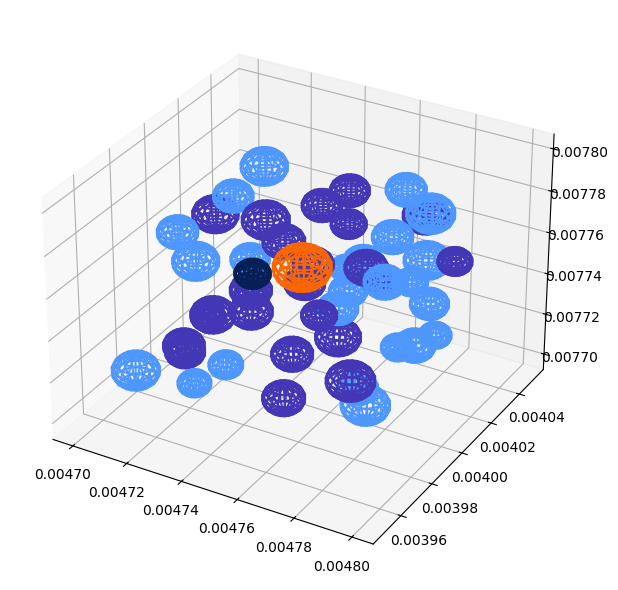

(<module 'matplotlib.pyplot' from 'c:\\Users\\geige\\miniconda3\\envs\\spikingModel\\lib\\site-packages\\matplotlib\\pyplot.py'>,
 <Axes3D: >)

In [16]:
from snudda.plotting.plot_network import PlotNetwork
pn = PlotNetwork(network_path)
pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False)

### Plotting connection probability between SPNs

__Note that for small networks the connectivity can only be plotted for shorter distances.__

Assuming volume type: cube [cube or full]
Only using 20000 neurons of the connection data
Number of neurons: 50
Synapse row 0 - 0.0 % time: 0.0007452999998349696 seconds
Created connection matrix 0.009920499998770538 seconds
Created gap junction connection matrix 0.00016090000099211466 seconds
Creating population dictionary
Done.
!!! Setting sideLen to None
Calculating synapse distance histogram
Creating dist histogram
n_synapses = 2096, at 0
Created distance histogram (optimised) in 0.02295389999926556 seconds
Saving cache to networks/striatum_example\network-synapses.hdf5-cache
Plotting connection probability dSPN to iSPN (synapses)
Centering in None : Keeping 24/24
Counting connections


c:\Users\geige\miniconda3\envs\spikingModel\lib\site-packages\snudda\analyse\analyse.py:1443: RuntimeWarning: invalid value encountered in divide
  p_con = np.divide(count_con, count_all)


Requested: 10000000.0 calculated [576.]
Num pairs outside plot range 0
P(d<5e-05) = 0.06402439024390244
P(d<0.0001) = 0.059027777777777776


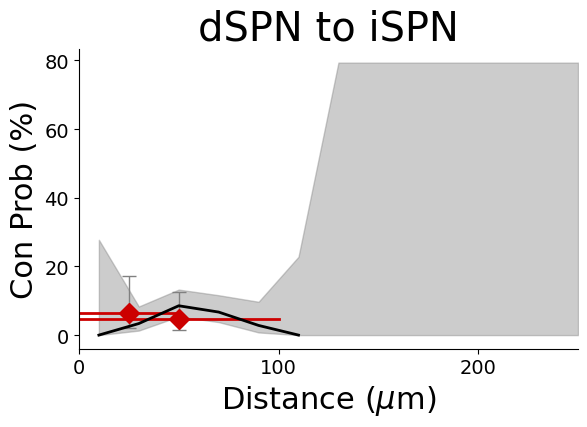

Wrote networks/striatum_example\figures\Network-distance-dependent-connection-probability-dSPN-to-iSPN-synapses-3D-dist.png
Plotting connection probability dSPN to dSPN (synapses)
Centering in None : Keeping 24/24
Counting connections


c:\Users\geige\miniconda3\envs\spikingModel\lib\site-packages\snudda\analyse\analyse.py:1443: RuntimeWarning: invalid value encountered in divide
  p_con = np.divide(count_con, count_all)


Requested: 10000000.0 calculated [552.]
Num pairs outside plot range 0
P(d<5e-05) = 0.23622047244094488
P(d<0.0001) = 0.21014492753623187


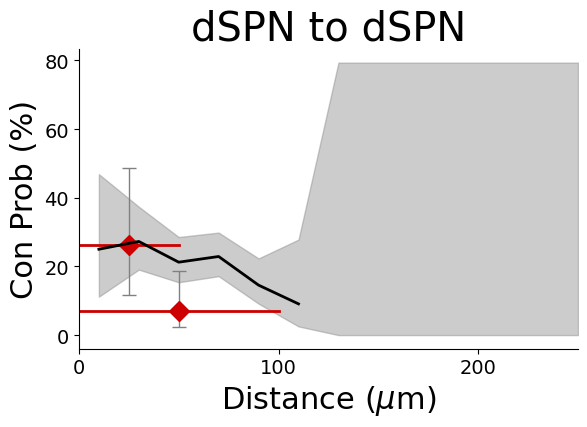

Wrote networks/striatum_example\figures\Network-distance-dependent-connection-probability-dSPN-to-dSPN-synapses-3D-dist.png
Plotting connection probability iSPN to dSPN (synapses)
Centering in None : Keeping 24/24
Counting connections


c:\Users\geige\miniconda3\envs\spikingModel\lib\site-packages\snudda\analyse\analyse.py:1443: RuntimeWarning: invalid value encountered in divide
  p_con = np.divide(count_con, count_all)


Requested: 10000000.0 calculated [576.]
Num pairs outside plot range 0
P(d<5e-05) = 0.2865853658536585
P(d<0.0001) = 0.2604166666666667


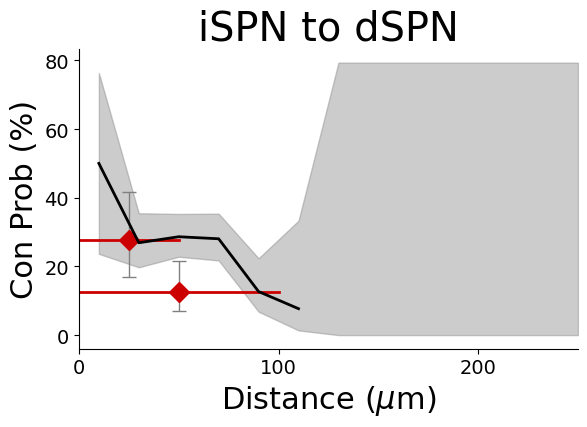

Wrote networks/striatum_example\figures\Network-distance-dependent-connection-probability-iSPN-to-dSPN-synapses-3D-dist.png
Plotting connection probability iSPN to iSPN (synapses)
Centering in None : Keeping 24/24
Counting connections
Requested: 10000000.0 calculated [552.]
Num pairs outside plot range 0
P(d<5e-05) = 0.4742857142857143
P(d<0.0001) = 0.4329710144927536


c:\Users\geige\miniconda3\envs\spikingModel\lib\site-packages\snudda\analyse\analyse.py:1443: RuntimeWarning: invalid value encountered in divide
  p_con = np.divide(count_con, count_all)


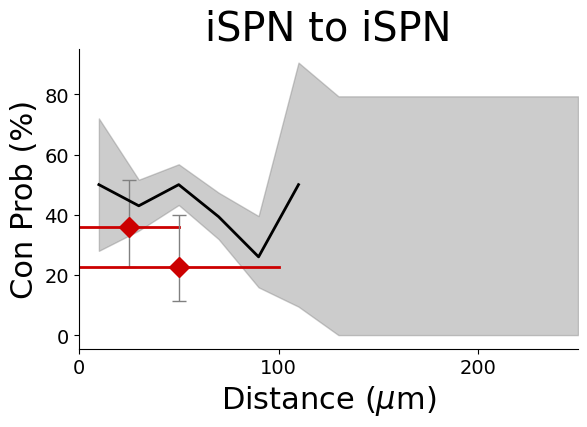

Wrote networks/striatum_example\figures\Network-distance-dependent-connection-probability-iSPN-to-iSPN-synapses-3D-dist.png


({5e-05: 0.4742857142857143, 0.0001: 0.4329710144927536},
 'networks/striatum_example\\figures\\Network-distance-dependent-connection-probability-iSPN-to-iSPN-synapses-3D-dist.png')

In [18]:
from snudda.analyse.analyse import SnuddaAnalyse

network_file = os.path.join(network_path, "network-synapses.hdf5")
nas = SnuddaAnalyse(network_file, volume_type="cube")

nas.plot_connection_probability("dSPN", "iSPN",
                                exp_max_dist=[50e-6, 100e-6],
                                exp_data_detailed=[(3, 47), (3, 66)])
nas.plot_connection_probability("dSPN", "dSPN",
                                exp_max_dist=[50e-6, 100e-6],
                                exp_data_detailed=[(5, 19), (3, 43)])
nas.plot_connection_probability("iSPN", "dSPN",
                                exp_max_dist=[50e-6, 100e-6],
                                exp_data_detailed=[(13, 47), (10, 80)])
nas.plot_connection_probability("iSPN", "iSPN",
                                exp_max_dist=[50e-6, 100e-6],
                                exp_data_detailed=[(14, 39), (7, 31)])

## Simulating

To generate input and simulate this network in NEURON please see ```striatum_example_simulate.ipynb```.

**Important** you need to shut down the kernel in this notebook before running the next notebook, otherwise the hdf5 file will complain that it is already locked.
